<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@100..900&display=swap" rel="stylesheet">

<h1 style="font-family: 'Montserrat', sans-serif; font-size:40px; color:#01753a; text-align: center;">
    Understanding the Relationship between Corn Expansion and Deforestation
</h1>
<p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right"> December 2024 </p>
<hr>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;">Nadège Baertschi, Zélia Décaillet, Simon Dutruy, Mert Ülgüner</p>

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Lifecycle_study.png" alt="Structure of the article" width="1000">

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">To guide you through our research, we’ve structured the study like the growth of a tree, as shown above. Each stage represents a key step in our journey.

# Table of Content
01. [Why does this study matter? Our hypothesis](#1-Watering-the-Soil)
02. [What is the data we are working with?](#2-Planting-the-Seed)
03. [Initial insights : what does the data reveal?](#3-Breaking-Ground)
04. [Building the statistical model](#4-Growing-the-Shoot)
05. [How robust is the model? Tackling endogeneity](#5-Strengthening-the-Trunk)
06. [How uniform is the relationship across our database? Tackling heterogeneity](#6-Branching-Out)
07. [Discussion: How should we interpret our results?](#7-Growing-the-Foliage)
08. [What are the limitations of our study and its potential extensions?](#8-Reaching-the-Canopy)
09. [Appendices](#Appendices)

# 01 Watering the Soil
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section1.png" alt="Structure of the article" width="150">

## Why does this study matter? 🧐

<div style="background-color: #deefbb;color:#000000; padding: 10px; text-align:center;border-radius: 5px;font-family: 'Trebuchet', bold, sans-serif; font-size:14px;">
    <b>Did you know that the annual rate of deforestation in 2022 was equivalent to deforesting 15 football (soccer) fields per minute? </b> <p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right">(State of climate action 2023)</p>
</div>
 
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> When we talk about climate change, forests often come up as both part of the solution and part of the problem. Known as “carbon sinks,” they play a crucial role in absorbing and storing carbon dioxide, which helps regulate the planet’s atmosphere. Beyond their environmental importance, forests are also home to an incredible variety of life. But when forests are destroyed, the carbon they store is released back into the air, and this contributes to global emissions. <b>Each year, forest loss releases nearly 5 billion tons of carbon dioxide</b>, which is equivalent to around 10% of all human-caused emissions (Gibbs et al., 2018). </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Deforestation is, therefore, a double-edged sword in our fight against climate change. Not only does it reduce the ability of forests to absorb greenhouse gases, but it also becomes a direct source of emissions, speeding up global warming. <b>So, what’s causing this destruction?</b> </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> You can see in <b>Figure 1</b> how we’ve come to the hypothesis that <b>corn fields expansion might be one of the causes</b>. While other agricultural activities, such as meat and palm oil production, are widely recognized as major drivers of deforestation, we chose to focus on corn. This decision stems from a growing awareness of the environmental impact of palm oil and a cultural shift, particularly among younger generations, away from meat and animal-based products (Salehi et al., 2023). As attention turns away from these commodities, we believe cereals could become increasingly prevalent in the future, particularly corn, due to its versatility and demand across food, biofuels, and animal feed. </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this study, we aim to test our hypothesis by addressing the central research question: <b>Could corn fields expansion lead to deforestation?</b> To answer this, we will analyze data and apply <b>statistical methods</b> to uncover the relationship between corn field expansion and forest loss. By doing so, we hope to determine not just if a link exists, but whether there is a <b>causal relationship</b> driving this trend. </p>

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Figure_1.png" alt="Hypothesis" width="800">

# 02 Planting the Seed
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section2.png" alt="Structure of the article" width="150">

## What is the data that we are working with? 🗃️

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Before jumping into the realm of statistics, we must gather and understand the data that we need. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this study, our two key numbers, or variables, are: <b>the area covered by cornfields and the area covered by forests</b>, both measured in square kilometers, as we aim to estimate how much a change in the area of cornfields relates to a change in the forest coverage.  </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> However, we also need to consider other factors—called control variables—to ensure we’re isolating the specific impact of corn expansion on deforestation. These controls help us account for other influences that might affect the relationship, so we can focus on the role corn culture plays more accurately. Throughout our analysis, we will use three existing research papers—Jayathilake et al. (2021), Laso Bayas et al. (2022), and Sylvester et al. (2024)—to guide the selection of variables and the construction of our statistical model. All three studies emphasize the significant role of agriculture in driving deforestation. From their findings, we decided to include the following variables: </p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> GDP:</b> Wealthier countries with higher GDP may exhibit increased deforestation due to higher demand for agricultural commodities and infrastructure development (Sylvester et al., 2024).</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Temperature: </b> It plays a critical role in deforestation through its impact on crop yields and land suitability, potentially incentivizing agricultural expansion into forested areas (Laso Bayas et al. 2022). </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Cattle farming: </b> Corn has an important role as a feed crop, particularly formeat-producing animals. Corn is a primary component of cattle feed. Its cultivation may influence forest conversion to arable land. This link is emphasized by Jayathilake et al. (2021) who highlighted the indirect pressures of livestock farming on deforestation through crop demand. </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Suitable Land Available for Corn Expansion Other Than Forests: </b>This variable serves as a proxy for the potential areas where corn culture can be expanded, reflecting whether agricultural expansion is likely to target forested areas or shift to other available lands. Countries with plenty of non-forested but usable land may reduce the pressure to clear forests for new crops. On the other hand, a lack of suitable alternatives could increase the likelihood of forests being converted into cornfields (Foley et al., 2011; Gibbs et al., 2010). This means we might observe a stronger relationship for these countries.  </li> </ul>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> All our variables and their relationships are summarized in this figure below: </p>
<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/DAG.png" alt="DAG" width="600">

### Database

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">  We built our dataset relying on two reliable sources: <ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <a href="https://www.fao.org/faostat/" target="_blank">FAO Database</a>: Provides detailed statistics on global agricultural production and land coverage, including data on cornfield areas and forest areas. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <a href="https://www.qog.pol.gu.se/" target="_blank">QoG Institute Database</a>: Offers governance-related indicators, such as the corruption index, GDP, and rural population. </li> </ul> <p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Our dataset spans <b>72 countries</b> across five continents, and covers the years <b>2000 to 2021</b>.  </p>

In [1]:
# Importing the libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import scipy.stats as stats
import pycountry
import plotly.express as px
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML


# Importing our pre-built clean database & drop oultiers
url = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Database.csv'
df_init = pd.read_csv(url)
df_init.drop(columns='Unnamed: 0',inplace=True)
df = df_init[~df_init["country"].isin(['Brazil', 'Russian Federation', 'China', 'United States of America', 'Canada'])]

### Key considerations

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We're now almost ready to start the construction of our model. But before engaging ourselves into this next step, it is first important to aknowledge the potential biases and weaknesses of the data we are working with. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> What you need to know: </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> Data transformation:</b> When we looked at our database, we noticed that it is heavily skewed—most values are clustered on one side of the scale, with a few extreme values stretching far away from the rest. This skewness can make our analysis unreliable because those extreme values might influence the results. To address this, we applied a square root transformation to our variable of interest, cornfield area (in sq km). This transformation helps reduce the impact of outliers (higher values) while maintaining the overall structure of the data. We preferred a square-root transformation to the log transformation as it flatten the datas a little bit less and offer better management for 0s. The interpretation changes a little bit: we’re now examining how changes in the square root of cornfield area relate to changes in forest area. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Geographic Coverage and its bias: </b>
Our dataset lacks of data representing tropical regions in Africa, Asia, and Latin America, where deforestation due to agricultural expansion is most pronounced. While this focus is crucial for understanding the issue in areas with significant forest loss, it introduces a bias that could underestimate the global relationship between corn expansion and deforestation. Temperate and industrialized regions, like parts of Europe and North America, where forest cover is stable or increasing, are more represented. This imbalance means our results may reflect weaker impacts than what might be observed in regions with different land-use dynamics.</li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Imperfect or omitted control variables: Are we missing something?</b>
The relationship between corn expansion and deforestation is shaped by numerous factors.  While we’ve included key control variables, we might still miss some, because they are hard to measure or lack data. For instance, anti-deforestation policies could be an omitted variable. Given that these policies directly impact how land-use decisions are made, potentially reducing the likelihood of forests being converted into cornfields, we might overestimate the effect of corn expansion on deforestation as we don't include them. Moreover, we use non-forested suitable land available for corn expansion as a proxy for the potential development for cornfields. However it is imperfect as it lacks spatial precision and doesn’t account for accessibility. As a result, it could bias our results in either direction: overestimating the impact of corn expansion if it underrepresents alternative land availability, or underestimating it if it overrepresents the suitability of non-forested land.</li>
<li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Dropping huge outliers:</b> We initially had data for 77 countries but decided to drop the 5 following countries: Brazil, Canada, China, Russian Federation and United States of America as they represent extreme outliers on many dimensions of our data panel. Even after the data transformation, those countries dragged the results, mainly because of their huge forest areas and corn production. To allow ourselves to find a causal relationship for the countries in general, we simply dropped the extreme values brought by those countries.</li> </ul>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We describe and discuss the limitations of our data, and therefore of our analysis, in more details later in <a href="#Limitations-of-our-data-and-the-choice-of-our-variables">Section 8</a>. </p>

# 03 Breaking Ground
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section3.png" alt="Structure of the article" width="150">

## Initial insights : what does our data reveal? 🔍

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">  Let's look at our data and what it initially reveals, so we can have an idea if our hypothesis has a chance to be valid. </p>

### How did global forest area change over time?

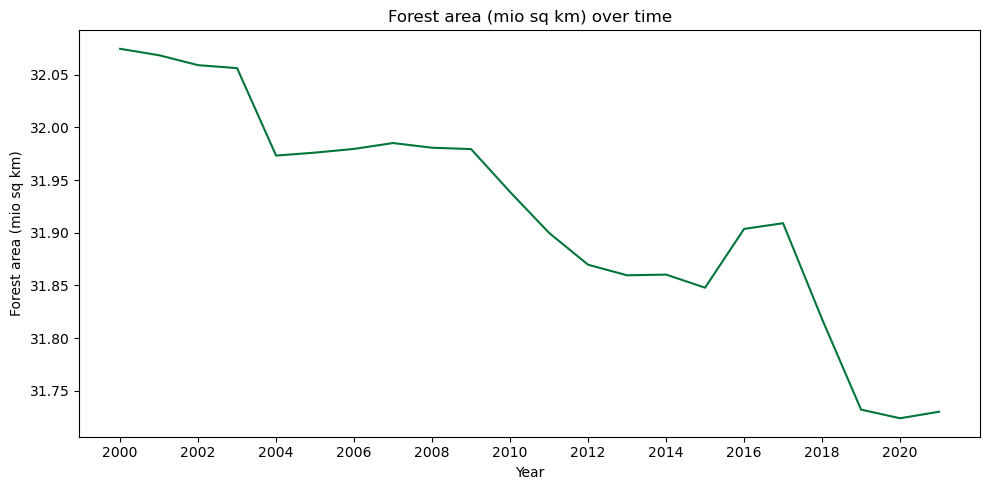

In [1044]:
df_init['forestgraph'] = df_init['forest']/1000000 #to avoid scientific notations on graph scales
# Lineplot to highlight the trend of forest area
plt.figure(figsize=(10,5))
forests = df_init.groupby(by='year')['forestgraph'].sum().reset_index()
plt.plot(forests['year'], forests['forestgraph'], color='#01753a')
plt.title('Forest area (mio sq km) over time')
plt.xlabel('Year')
plt.xticks(forests['year'][::2])
plt.ylabel('Forest area (mio sq km)')
plt.tight_layout()
plt.show()

### How did global cornfield area change over time?

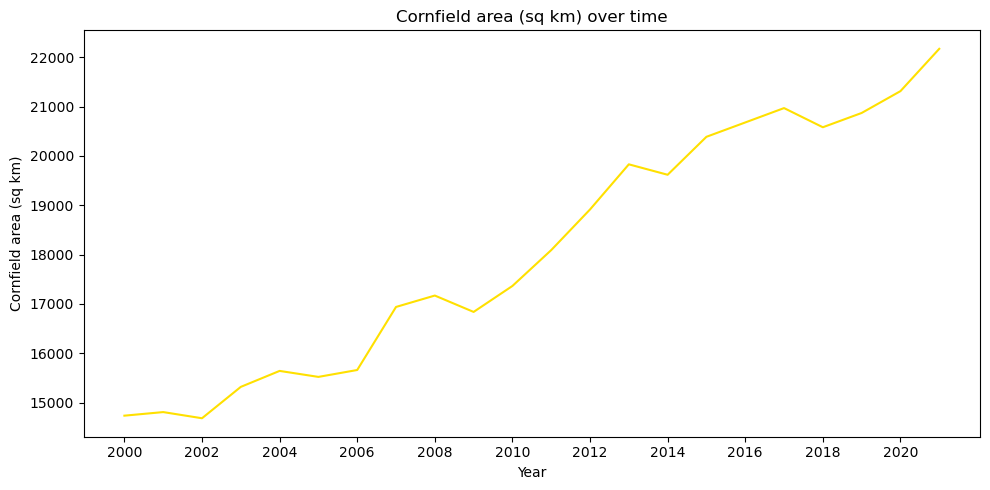

In [1046]:
plt.figure(figsize=(10,5))
# Lineplot to highlight the trend of cornfield area
corn_area = df_init.groupby(by='year')['corn'].mean().reset_index()
plt.plot(corn_area['year'],corn_area['corn'],color='#ffe000')
plt.title('Cornfield area (sq km) over time')
plt.xlabel('Year')
plt.xticks(corn_area['year'][::2])
plt.ylabel('Cornfield area (sq km)')
plt.tight_layout()
plt.show()

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> These two figures reveal a clear pattern: as forest areas have decreased over time (-1.09%), cornfield areas have grown (+50.44%). This suggests a potential link between the two, aligning with our hypothesis that corn expansion might be contributing to forest loss. While this doesn’t prove causation, it’s enough to prompt a closer look. Let’s see the actual correlation between these two variables. </p>

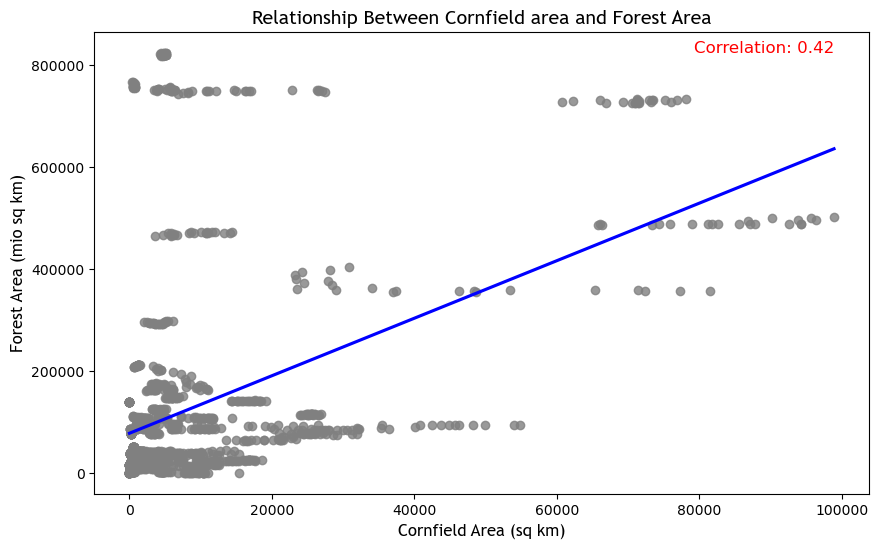

In [3]:
# Correlation coefficient
corr, p_value = pearsonr(df['corn'], df['forest'])

# Regression line for the correlation between the two key variables
plt.figure(figsize=(10, 6))
sns.regplot(x='corn',
            y='forest',
            data=df,
            scatter_kws={'color': 'grey'},
            line_kws={'color': 'blue'}, 
            ci=None)
# Labels
plt.xlabel("Cornfield Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.ylabel("Forest Area (mio sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.title("Relationship Between Cornfield area and Forest Area", fontdict={'fontsize': 14, 'fontname': 'Trebuchet MS'})
# Add the correlation coefficient to the plot
plt.text(x=df['corn'].quantile(0.99),  # x-coordinate (adjust as needed)
         y=df['forest'].max(),  # y-coordinate (adjust as needed)
         s=f'Correlation: {corr:.2f}',  # Text to display
         fontsize=12, color='red')

# Show the plot
plt.show()
#print(f"{p_value:.2f}")

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">The correlation coefficient of 0.42 between cornfield area and forest area presents an unexpected result. Instead of a negative relationship supporting our hypothesis—that corn expansion drives deforestation—we see a moderate positive correlation. This could suggest that cornfields and forests are often concentrated in the same regions, such as tropical areas, where both land types coexist. Alternatively, it raises a critical question: could our hypothesis be invalid? Perhaps corn expansion isn’t a primary driver of forest loss after all.</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> This outcome may be influenced by confounding factors—variables that affect both cornfield area and forest area, potentially obscuring the true relationship. If these confounders aren’t properly accounted for, they could distort our understanding of the connection between corn expansion and deforestation. This leads us to our next stage, where we move beyond correlation and use causal methods that include them.</p>

# 4 Growing the Shoot
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section4.png" alt="Structure of the article" width="150">

## Building our statistical model 📈

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">To go beyond the simple correlation, we’ll use a method called Ordinary Least Squares (OLS) regression. This tool will help us to quantify the relationship between two variables—in this case, cornfield area and forest area, while accounting for other factors that might influence this relationship. By including these additional variables, OLS allows us to isolate the effect of cornfield expansion, giving us a clearer picture of whether it’s playing a role in forest loss. The results of this analysis won’t just help us test our hypothesis; they’ll provide valuable insights into how agricultural practices impact forests, guiding policies and land management decisions to address deforestation more effectively. It’s like peeling back the layers to find the core of the issue.</p>

### OLS with control variables and fixed effects (Our baseline model)

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{it}} + \beta_2^\prime X_{it} + \text{FE}_i + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The terms in our OLS model are:</p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    <b> Forest<sub>it</sub>:</b> This is our dependent variable. It refers to forest area in square kilometers in country i at year t </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>0</sub>:</b> The intercept term. It represents the expected value of Forest<sub>it</sub> when all other variables are zero. Essentially, it captures the baseline forest area when no other factors are at play. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>1</sub>:</b> The coefficient β<sub>1</sub> measures the effect of the square root of cornfield area (Corn<sub>it</sub>) on Forest<sub>it</sub>. A negative β<sub>1</sub> would suggest that an increase in cornfield area corresponds to a decrease in forest area, supporting the hypothesis that corn expansion comes at the expense of forests. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> √Corn<sub>it</sub>:</b> This is our variable of interest, the independent variable. It represents the square root of cornfield area in country i at year t. The root transformation has been chosen to reduce the skewness of the variable, it helps us to handle the outliers while being less extreme than logarithmic transformation in the sense that it conserves a little bit more of the within-country variance.</li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>2</sub>′X<sub>it</sub>:</b> Vector of coefficients accounting for the effects of control variables such as GDP or temperature, which may also influence forest area. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> FE<sub>i</sub>:</b> The country-specific fixed effect. This accounts for unobserved, time-invariant characteristics of country i that may influence forest area. It helps control for differences across countries that do not change over time (the landsize for example). </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> ε<sub>it</sub>:</b> The error term. This captures all other unobserved factors influencing forest area for country <em>i</em> at year <em>t</em>. </li>

In [4]:
# Baseline Regression
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + sqrtgdp + Average_Temperature + cattleM + EntityEffects",
                            data=df.set_index(["country", "year"]))
baseline = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

fei_resid = baseline.resids
fei_fit = baseline.fitted_values
fei_cov = baseline.cov

#print(baseline.summary)
#stargazer1 = Stargazer([baseline])
#stargazer1.custom_columns(['Baseline'])
#display(HTML(stargazer1.render_html()))

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/1484331160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forest_demeaned'] = df['forest'] - df.groupby('country')['forest'].transform('mean')
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/1484331160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corn_demeaned'] = df['sqrtcorn'] - df.groupby('country')['sqrtcorn'].transform('mean')


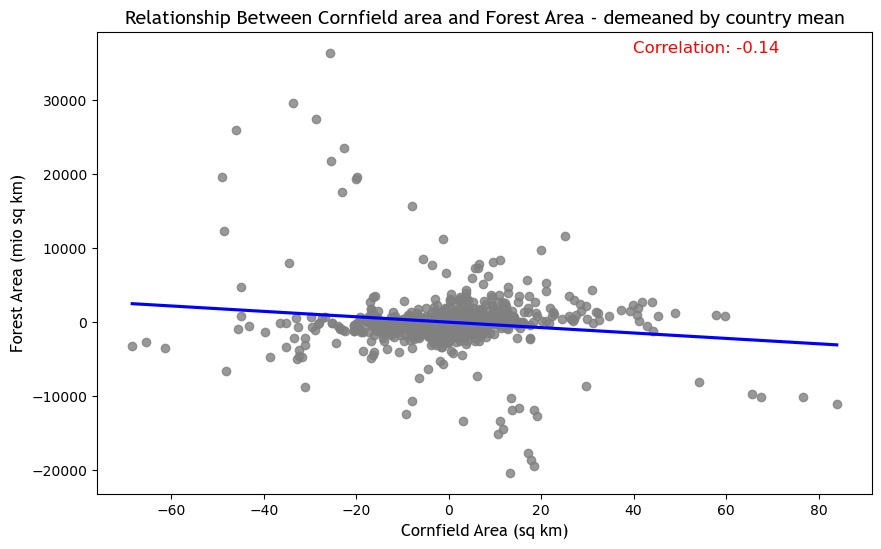

In [5]:
# Adjust forest and corn to account for fixed effects (demeaning) and allow their plotting
df['forest_demeaned'] = df['forest'] - df.groupby('country')['forest'].transform('mean')
df['corn_demeaned'] = df['sqrtcorn'] - df.groupby('country')['sqrtcorn'].transform('mean')

# Correlation coefficient
corr, p_value = pearsonr(df['corn_demeaned'], df['forest_demeaned'])

# Regression line for the correlation between the two key variables
plt.figure(figsize=(10, 6))
sns.regplot(x='corn_demeaned',
            y='forest_demeaned',
            data=df,
            scatter_kws={'color': 'grey'},
            line_kws={'color': 'blue'}, 
            ci=None)
# Labels
plt.xlabel("Cornfield Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.ylabel("Forest Area (mio sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.title("Relationship Between Cornfield area and Forest Area - demeaned by country mean", fontdict={'fontsize': 14, 'fontname': 'Trebuchet MS'})
# Add the correlation coefficient to the plot
plt.text(x=df['corn_demeaned'].quantile(0.99),  # x-coordinate (adjust as needed)
         y=df['forest_demeaned'].max(),  # y-coordinate (adjust as needed)
         s=f'Correlation: {corr:.2f}',  # Text to display
         fontsize=12, color='red')

# Show the plot
plt.show()
#print(f"{p_value:.2f}")

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
This plot illustrates the relationship between cornfield area and forest area, after adjusting for country-specific fixed effects. The variables are demeaned, meaning that the values of cornfield area and forest area are adjusted by subtracting their country-specific means. This adjustment focuses on the within-country variation over time, isolating changes that occur within each country rather than differences across countries. The small negative correlation hints at a possible connection between corn expansion and deforestation within countries, but it’s not strong enough to draw definitive conclusions.

### Results of our baseline model

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Table_1.png" alt="Table 1" width="800">

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Now that we tested how corn expansion affects forest using our three control variables that can affect both forest areas and cornfield areas (GDP, temperature and cattle), we see that the coefficient and the correlation between the cornfield area and forest area became negative. For each unit increase of the square root of cornfield area, the forest area diminishes by 40 sqkm. However we still lack of causal evidence as our relationship is very weak, because the p-value of 0.37, which measures the statistical significance of the corn coefficient, is above the 0.05. In research, we often use a 5% threshold (p-value &lt 0.05) to determine significance, which would mean there’s less than a 5% chance the result is random. Additonnaly, by seeing the very low R-squared value, we see that we only explain 3% (2.96% exactly) of the total variation of the forest. 

### Should we add time-specific fixed effects?

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Technological progress has significantly influenced corn production efficiency over the years. <a href="https://doi.org/10.1371/journal.pone.0254423"> Wang and Hu (2021)</a>, while analyzing corn production from 2012 to 2019, found that technological advancements improved production efficiency, with technical efficiency stabilizing above 90% by 2015.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
By including time fixed effects, we can better account for such industry-wide changes that occur over time but are consistent across countries, ensuring a more accurate assessment of the relationship between corn expansion and deforestation.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
This means that adding time fixed effects can allow us to control for temporal factors like technological advancements, leading to a more precise understanding of how corn expansion impacts forest areas.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Our second OLS model is therefore:

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{it}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \epsilon_{it}
$$

In [12]:
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + sqrtgdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
fixedEffects = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

feit_resid = fixedEffects.resids
feit_fit = fixedEffects.fitted_values
feit_cov = fixedEffects.cov

#print(fixedEffects.summary)
#stargazer2 = Stargazer([baseline, fixedEffects])
#stargazer2.custom_columns(['Baseline','TimeFixedEffects'])
#display(HTML(stargazer2.render_html()))

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Table_2.png" alt="Table 2" width="800">

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
We can see that the inclusion of time-specific fixed effects slightly changed our results. The coefficient between corn and forest area remains negative but decreased slightly from -39.898 to -40.605. Our confidence in the result, represented by the p-value, also diminished, increasing from 0.3697 to 0.3860 (the confidence level is high when the p-value is low). Due to this higher p-value, we still cannot reject the hypothesis that there is no correlation between our variables. While the R-squared value improved slightly from 0.0296 to 0.0326, indicating a marginal increase in the model’s ability to explain forest area, the results remain statistically weak.

# 5 Strengthening the Trunk
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section5.png" alt="Structure of the article" width="130">

## How robust is the model? Tackling endogeneity 🦾

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We’ve run our panel OLS regression and drawn initial conclusions, but how confident can we be that corn expansion is truly driving deforestation? Not a lot at the time. We will now address some of our potential endogeneity issues. Our model might be biased because of a potential reverse causality. Reverse causality means the relationship might run the other way: what if deforestation, by opening up land, is actually driving corn expansion instead? </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> To address this issue, we’ll introduce a technique called lagging our independent variable. By using the value of the square root of cornfield area from the previous year instead of the current year, we can reduce the risk of reverse causality. This approach ensures that any observed changes in forest area are more likely to follow from cornfield expansion rather than the other way around. Lagging allows us to capture the delayed effects of agricultural expansion on forests, making our analysis more robust.</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> It means that now our regression model is:</p>

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{i(t-1)}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Let’s see if this adjustment strengthens our results!

In [13]:
# Create the lagged variable for logcorn within each country
df['sqrtcorn_lag1'] = df.groupby('country', observed=True)['sqrtcorn'].shift(-1)

# Drop 2021 rows
df.dropna(inplace=True)

est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn_lag1 + sqrtgdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
lagFE = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felag_resid = lagFE.resids
felag_fit = lagFE.fitted_values
felag_cov = lagFE.cov

#print(lagFE.summary)
#display(HTML(Stargazer([baseline, fixedEffects, lagFE]).render_html()))

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/2031742950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqrtcorn_lag1'] = df.groupby('country', observed=True)['sqrtcorn'].shift(-1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/2031742950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Table_3.png" alt="Table 3" width="800">
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The results from this new model show a more negative coefficient for corn expansion (−49.094), but our confidence in the relationship has slightly improved, as indicated by the decrease in the p-value to 0.3458. However, it is still not statistically significant.</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> To build on this, we’ll next explore how the availability of non-forested land might amplify or mitigate this relationship, shedding light on where and why corn expansion has the most significant impact on forests.</p>

# 6 Branching Out
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section6.png" alt="Structure of the article" width="125">

## How uniform is the relationship across our database? Tackling heterogeneity 🔁

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> So far, we’ve assumed that the relationship between corn expansion and deforestation is consistent across all countries in our dataset. But is that really the case? Some regions might feel this pressure more acutely than others, depending on the availability of non-forested land for agricultural expansion. For instance, in countries where little suitable land is available for corn expansion, forests may be the only option, potentially leading to a stronger relationship between corn expansion and deforestation.</p> 

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
This is another critical aspect of causality that we need to address. If the relationship varies significantly based on land availability, it could indicate that deforestation is context-dependent rather than a universal outcome of corn expansion. The country-specific fixed effects that are included in our baseline model cannot address this issue alone. This is why we’ll analyze the heterogeneity in our results by using a variable that we described earlier in this study: suitable land available for corn expansion other than forests. This serves as a proxy for the constraints countries face when expanding their agricultural land. While an ideal measure would be the exact proximity between cornfields and forests, but like we said previously, this is difficult to quantify. Nevertheless, our proxy still allows us to test whether the relationship between corn expansion and deforestation is stronger in places where forests are the primary land available for new crops.  </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> To account for this heterogeneity in our statistical model, we add a dummy variable. It is a binary variable that splits our dataset into two groups. If the dummy variable takes the value 1 for country t, this means that the non-forested suitable land available for corn expansion is higher than the global median in this country. Otherwise the dummy variable is equal to 0. We expect a higher relationship between cornfield expansion and forest when countries do not have a lot of potential for corn expansion (dummy=0). 
    
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Our final OLS model becomes:

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{i(t-1)}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \sqrt{\text{Corn}_{i(t-1)}}\times\text{Dummy} + \epsilon_{it}
$$

In [15]:
# Create the dummy variable
df['hetero']= df['suitability'].apply(lambda val: 1 if (val>df['suitability'].median()) else 0)

# Create the interaction term between the dummy variable and the square root of cornfield area
df['hetero_x_sqrtcorn'] = df['sqrtcorn_lag1']*df['hetero']

# Create the regression 
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn_lag1 + sqrtgdp + Average_Temperature + cattleM + hetero_x_sqrtcorn + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
feLagHetero = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felaghetero_resid = feLagHetero.resids
felaghetero_fit = feLagHetero.fitted_values
felaghetero_cov = feLagHetero.cov

#print(feLagHetero.summary)
#display(HTML(Stargazer([baseline, fixedEffects, lagFE, feLagHetero]).render_html()))

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/1363601430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hetero']= df['suitability'].apply(lambda val: 1 if (val>df['suitability'].median()) else 0)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_83956/1363601430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hetero_x_sqrtcorn'] = df['sqrtcorn_lag1']*df['hetero']


<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Table_4.png" alt="Table 4" width="800">

<p style="font-family: 'Trebuchet', sans-serif; font-size:20px;text-align:center;line-height: 1.6;"> <b> Interaction term: </b>


$$
\Large \sqrt{\text{Corn}_{i(t-1)}}\times\text{Dummy} = -91.023
$$
$$
\Large p-value = 0.1295
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The results from this final model provide insights into how corn expansion impacts forest area, depending on the availability of non-forested land, but goes against our previous intuition tha we might see a stronger relationship in countries with little land availability.
    
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The coefficient for lagged cornfield area &radic;<span style="text-decoration: overline;">corn(t-1)</span> suddenly becomes positive with a value of 33.196. It represents the effect when the dummy variable equals 0, so for countries with limited non-forested suitable land for corn expansion. This positive coefficient suggests that, in these contexts, corn expansion is not strongly associated with deforestation. This is counterintuitive with our preivous idea that corn expansion should be a stronger driver to forest loss.  This could be because cornfield expansion occurs alongside forest preservation in these countries. However, the p-value of 0.0822 indicates that this result is only marginally significant, so we cannot confidently conclude this relationship exists.

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The interaction term has a coefficient of -91.023, capturing the additional effect of corn expansion in countries with high non-forested land availability (dummy = 1). Adding this to the baseline coefficient (33.196 - 91.023 = -57.827) reveals a strongly negative relationship between corn expansion and forest area in these countries. However, the p-value for the interaction term (0.1295) shows this result is not statistically significant, and the wide confidence interval (-208.72 to 26.669) underscores its uncertainty.

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
These findings supports our idea that land availability plays a key role in moderating the relationship between corn expansion and deforestation, but not in the way we thought. In countries with limited land availability, the relationship is weaker or even positive, while in countries with abundant land, corn expansion seems to exert greater pressure on forests. However, due to the lack of statistical significance, these results should be interpreted with caution.


# 7 Growing the Foliage
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section7.png" alt="Structure of the article" width="125">

## Discussion : How should we interpret our results? 🕵️

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
After testing multiple models, we’ve explored whether corn expansion is a driver of deforestation. Let’s reflect on what our results reveal and the challenges they present for proving causality.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In our models, we consistently observe a negative relationship between cornfield expansion and forest area. This aligns with the hypothesis that growing cornfields might come at the expense of forests. However, there are critical caveats that temper our confidence in this conclusion.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
First, across all models, the p-values for the cornfield coefficients remain above the common threshold of 0.05. In research, this threshold often signifies "statistical significance," meaning results are unlikely to be due to random chance. While some coefficients approach significance—like the positive coefficient in the heterogeneity model (p = 0.0822)—none definitively cross this threshold. This means we cannot confidently reject the possibility that the observed relationships are due to randomness rather than a causal link.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Second, the R-squared values for all models are low, never exceeding 5%. This means that the models explain only a tiny fraction of the variation in forest area, suggesting other unmeasured factors are likely driving forest loss. Deforestation is influenced by a wide range of forces—such as governance, local land policies, and broader economic trends—many of which are not captured in our models.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
The inclusion of the heterogeneity dummy variable provides some nuanced insights. It highlights how land availability might influence the relationship between corn expansion and deforestation. Interestingly, in countries with abundant non-forested land, the relationship between corn expansion and forest loss appears stronger (negative coefficient), while in countries with limited land availability, it is weaker or even positive. This could imply that cornfield expansion competes less with forests when other land options are scarce. However, the lack of statistical significance for these results means they remain speculative rather than conclusive.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Finally, we must grapple with broader methodological challenges. One key limitation is potential endogeneity—when variables we cannot measure or include, like deforestation policies or spatial accessibility, influence both corn expansion and deforestation, confounding the relationship. While we attempted to address this issue by lagging the cornfield variable and including fixed effects, these methods only partially mitigate the problem. True causality would require further approaches, such as using instrumental variables or natural experiments, which go beyond the scope of this study.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In conclusion, while our findings hint at a relationship between corn expansion and deforestation, they fall short of proving a causal link. The statistical insignificance, low explanatory power, and potential omitted variables suggest that more robust methods and richer data are needed to firmly establish causality. For now, corn expansion remains a plausible but unconfirmed driver of deforestation. Our results highlight the complexity of land-use change and the need for continued research in this area.

# 8 Reaching the Canopy 
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section8.png" alt="Structure of the article" width="125">

## What are the limitations of our study and its potential extensions? 📝🧩

### Limitations of our data and the choice of our variables

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> As we made it clear in Section 3, the relationship between corn expansion and deforestation is complex and shaped by many factors. Therefore it is challenging to determine which ones to include in order to build the right statistical model. We initially tested several variables beyond GDP, temperature, and cattle farming, such as rainfall, rural population, corn prices, and suitable land available for corn expansion other than forests, but we found their impact on deforestation to be negligible. Their regression coefficients were close to zero, meaning they had little to no influence. Moreover, removing them didn’t change the effects of the retained variables on deforestation, so we decided to exclude them from our final model. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> But still, no model is perfect. There’s always the possibility of omitted variable bias, like the one we described in our <a href="#Key-considerations"> key considerations</a> in Section 3, which is about the non-inclusion of anti-deforestation policies. There is also the bias that we might have with our imperfect heterogeneity variable. </p>

### Limitations of our models

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The main issue we have in our model come from the data itself actually. In fact, we observe very low forestation variation rates inside a given country. This absence of variance inside the country causes issues in the mathematical model. The very low variance of our dependent variable makes the model struggle to assign the origin of that variation. Where does it come from? To address this issue we could explore new databases or find a relevant linear transformation of our forest area. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Another key issue with our model is that the residuals—the errors terms in our models—are correlated with some variables. This breaks one of the hypotheses of OLS regression, which assumes that residuals and variables are unrelated. This suggests we may still have unresolved endogeneity (hidden factors influencing both corn expansion and deforestation) or that the relationships between our variables are not perfectly linear. Ideally, we would have explored more advanced methods or different ways to model these relationships, but due to time constraints, we were unable to pursue non-OLS techniques commonly used in the research on this topic.</p>

### Potential extensions

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
While our research provides valuable insights, several avenues could enhance its scope and precision. Addressing the omitted variables, such as anti-deforestation policies, could offer a clearer picture of how land-use decisions are shaped. Similarly, refining our heterogeneity variable—by incorporating spatial proximity between cornfields and forests—could reduce bias and better capture regional dynamics.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Future work could also explore region-specific analyses to uncover how deforestation drivers vary across ecological zones, such as tropical versus temperate regions. Incorporating time-varying factors like agricultural subsidies or trade policies might reveal how economic incentives influence deforestation over time. Finally, leveraging advanced statistical methods beyond OLS could improve the reliability of causal interpretations, particularly in the presence of endogeneity or non-linear relationships.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
By building on these elements, future studies can provide even stronger evidence for designing effective strategies to mitigate deforestation.

# References

 <p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
  D. Gibbs, N. Harris, and F. Seymour, “By the Numbers: The Value of Tropical Forests in the Climate Change Equation,” Apr. 2018, Accessed: Dec. 13, 2024. [Online]. Available: <a href="https://www.wri.org/insights/numbers-value-tropical-forests-climate-change-equation">https://www.wri.org/insights/numbers-value-tropical-forests-climate-change-equation</a><br><br>
  Erenstein et al. (2022). Global maize production, consumption and trade: trends and R&D implications. Food Security. 14. <a href="https://doi.org/10.1007/s12571-022-01288-7">10.1007/s12571-022-01288-7</a>.<br><br>
  FAO. (2023). Agricultural production statistics (2000–2022). <a href="https://openknowledge.fao.org/server/api/core/bitstreams/fba4ef43-422c-4d73-886e-3016ff47df52/content">https://openknowledge.fao.org/server/api/core/bitstreams/fba4ef43-422c-4d73-886e-3016ff47df52/content</a><br><br>
  Foley, J. A., et al. (2011). Solutions for a cultivated planet. Nature, 478(7369), 337-342.<br><br>
  Gilbert Griffin. 2024. Sustainable Timber Harvesting. Forestry. Accessed: Dec. 14, 2024. Available: <a href="https://forestry.com/forestry-management/sustainable-timber-harvesting/">https://forestry.com/forestry-management/sustainable-timber-harvesting/</a><br><br>
  Gibbs, H. K., et al. (2010). Tropical forests were the primary sources of new agricultural land in the 1980s and 1990s. Proceedings of the National Academy of Sciences, 107(38), 16732-16737.<br><br>
  H. M. Jayathilake, G. W. Prescott, L. R. Carrasco, M. Rao, and W. S. Symes, “Drivers of deforestation and degradation for 28 tropical conservation landscapes,” Ambio, vol. 50, no. 1, pp. 215–228, Jan. 2021, doi: <a href="https://doi.org/10.1007/s13280-020-01325-9">10.1007/s13280-020-01325-9</a>.<br><br>
  Hannah Ritchie (2021) - “Drivers of Deforestation” Published online at OurWorldinData.org. Retrieved from: <a href="https://ourworldindata.org/drivers-of-deforestation">https://ourworldindata.org/drivers-of-deforestation</a><br><br>
  J. C. Laso Bayas et al., “Drivers of tropical forest loss between 2008 and 2019,” Sci Data, vol. 9, no. 1, p. 146, Apr. 2022, doi: <a href="https://doi.org/10.1038/s41597-022-01227-3">10.1038/s41597-022-01227-3</a>.<br><br>
  J. M. Sylvester et al., “Analysis of food system drivers of deforestation highlights foreign direct investments and urbanization as threats to tropical forests,” Sci Rep, vol. 14, no. 1, p. 15179, Jul. 2024, doi: <a href="https://doi.org/10.1038/s41598-024-65397-3">10.1038/s41598-024-65397-3</a>.<br><br>
  Mark Hillsdon. (2024). How sustainable soy is critical to saving the Cerrado. Reuters. <a href="https://www.reuters.com/sustainability/land-use-biodiversity/how-sustainable-soy-is-critical-saving-cerrado-2024-10-21/">https://www.reuters.com/sustainability/land-use-biodiversity/how-sustainable-soy-is-critical-saving-cerrado-2024-10-21/</a><br><br>
  Salehi et al. (2023), Forty-five years of research on vegetarianism and veganism: A systematic and comprehensive literature review of quantitative studies, Heliyon, Volume 9, Issue 5, ISSN 2405-8440, <a href="https://doi.org/10.1016/j.heliyon.2023.e16091">https://doi.org/10.1016/j.heliyon.2023.e16091</a>.<br><br>
  “Deforestation: Accelerating climate change and threatening biodiversity,” World Bank Blogs. Accessed: Dec. 13, 2024. [Online]. Available: <a href="https://blogs.worldbank.org/en/opendata/deforestation-accelerating-climate-change-and-threatening-biodiversity">https://blogs.worldbank.org/en/opendata/deforestation-accelerating-climate-change-and-threatening-biodiversity</a><br><br>
  Wang J, Hu X (2021) Research on corn production efficiency and influencing factors of typical farms: Based on data from 12 corn-producing countries from 2012 to 2019. PLOS ONE 16(7): e0254423. <a href="https://doi.org/10.1371/journal.pone.0254423">https://doi.org/10.1371/journal.pone.0254423</a><br><br>
  Weisse et al. (2024). Forest Pulse: The Latest on the World’s Forests. Global Forest Review. World Resources Institute. <a href="https://research.wri.org/gfr/latest-analysis-deforestation-trends">https://research.wri.org/gfr/latest-analysis-deforestation-trends</a><br><br>
  State of Climate 2023. Climate Action Tracker. <a href="https://climateactiontracker.org/publications/state-of-climate-action-2023/"> https://climateactiontracker.org/publications/state-of-climate-action-2023/</a><br>
</p>


# Appendices

## Appendix 1 : General Considerations

### Initial Outliers

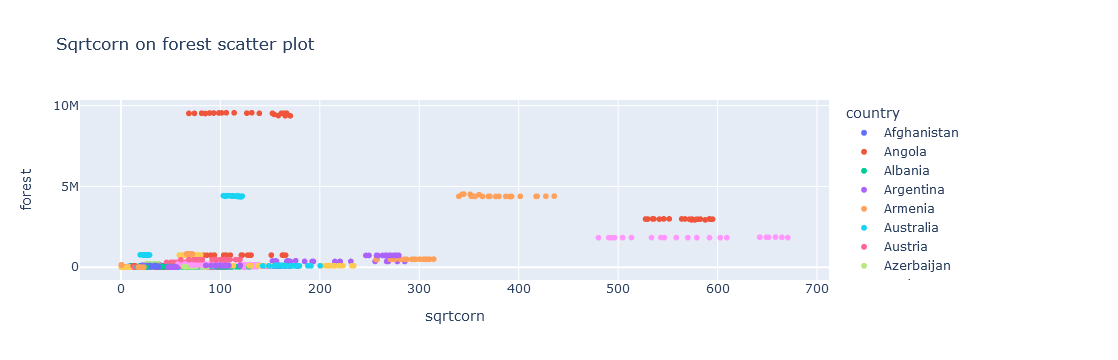

In [971]:
fig = px.scatter(df_init,
           x='sqrtcorn', 
           y='forest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','sqrtcorn','forest'],
           title='Sqrtcorn on forest scatter plot')

fig.show()

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We can clearly see the 5 extreme outliers present in the initial dataset: Brazil, Canada, China, Russian Federation and United States of America.</p>

### Correlation matrix

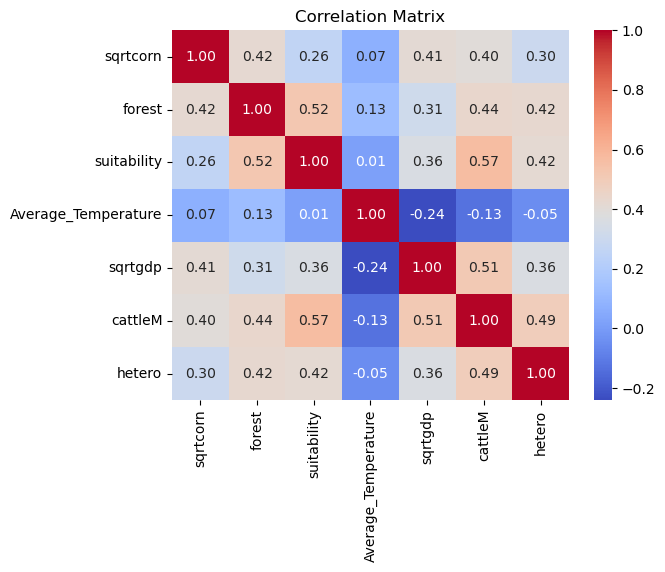

In [952]:
# Combine independent variables and dependent variable for the correlation matrix
variables = df[['sqrtcorn', 'forest', 'suitability', 'Average_Temperature', 'sqrtgdp', 'cattleM', 'hetero']]

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Display the correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Highlighting the lack of within-entity variance

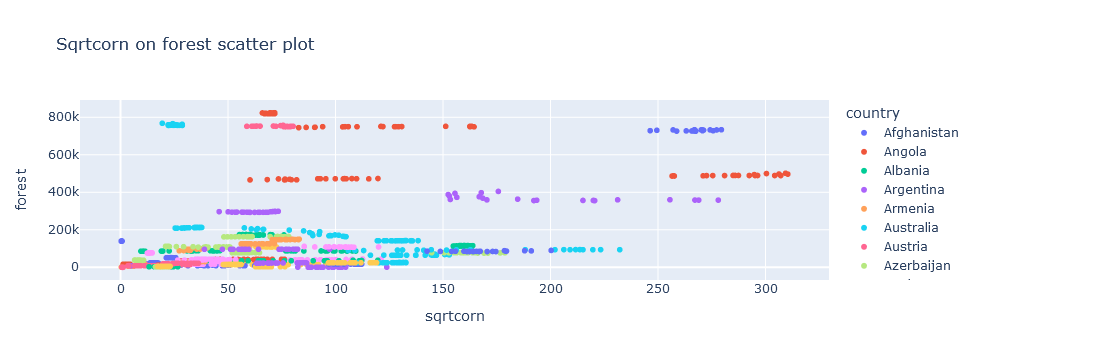

In [954]:
fig = px.scatter(df,
           x='sqrtcorn', 
           y='forest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','sqrtcorn','forest'],
           title='Sqrtcorn on forest scatter plot')

fig.show()

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">If we look closely, we can see how "flat" the lines are. This lack of within-entity variation has been an issue to run the standard OLS models. Indeed, the dependant variable becomes very correlated with our entity fix effects. This multicollinearity leads to huge standard errors, hence huge confidence intervals and low p-values.</p>

## OLS Hypothesis

<ul><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    1. Full rank matrix: No perfect collinearity between our variables. This hypothesis is verified as we managed to derive OLS, which is impossible with colinar variables (impossibility to invert the matrix).</li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    2. Conditional mean of residuals equals = 0: This hypothesis is verified for all our equations as shown in the following histograms where the mean tend to 0 in every plot.</li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        3. Homoskedasticity: We can relax this assumption as we use clustered standard errors thruogh our analysis, that accounts for heteroskedasticity.
    </li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        4. Non-correlation between residuals: We didn't have to test this assumption but a correlation between residuals seems possible.
    </li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        5. Normal distribution of residuals: This hypothesis is also not verified. We can see in the diagrams below that the distribution does not follow the normal distribution in red.
    </li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"></ul>


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Another main issue of our model is the correlation of the residuals. Indeed we do not fulfill the basic OLS hypothesis claiming non correlation between the residuals and the variable. We probably still have endogeneity issues along a sub-optimal functional form. We might observe non-linear relationships between variables. To address those issues, we lacked time to search for an appropriate functional form, as the literature on that subjects often use non-OLS methods to address our hypothesis.</p>

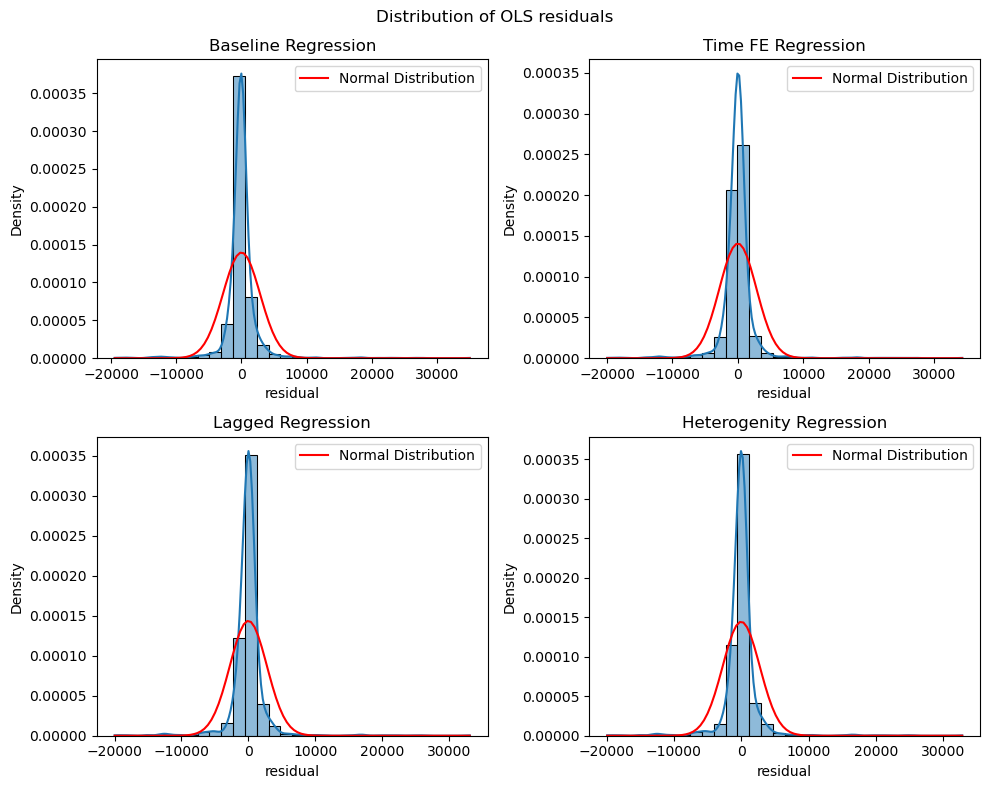

In [1010]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

fig.suptitle('Distribution of OLS residuals')

# Baseline Equation
axs[0,0].set_title('Baseline Regression')
sns.histplot(fei_resid, ax=axs[0,0], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[0,0].plot(np.linspace(min(fei_resid), max(fei_resid), 100), 
              stats.norm.pdf(np.linspace(min(fei_resid), max(fei_resid), 100), np.mean(fei_resid), np.std(fei_resid)), 
              label='Normal Distribution', color='red')
axs[0,0].legend()

# Time FE Equation
axs[0,1].set_title('Time FE Regression')
sns.histplot(feit_resid, ax=axs[0,1], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[0,1].plot(np.linspace(min(feit_resid), max(feit_resid), 100), 
              stats.norm.pdf(np.linspace(min(feit_resid), max(feit_resid), 100), np.mean(feit_resid), np.std(feit_resid)), 
              label='Normal Distribution', color='red')
axs[0,1].legend()

# Lagged Equation
axs[1,0].set_title('Lagged Regression')
sns.histplot(felag_resid, ax=axs[1,0], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[1,0].plot(np.linspace(min(felag_resid), max(felag_resid), 100), 
              stats.norm.pdf(np.linspace(min(felag_resid), max(felag_resid), 100), np.mean(felag_resid), np.std(felag_resid)), 
              label='Normal Distribution', color='red')
axs[1,0].legend()

# Time FE Equation
axs[1,1].set_title('Heterogenity Regression')
sns.histplot(felaghetero_resid, ax=axs[1,1], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[1,1].plot(np.linspace(min(felaghetero_resid), max(felaghetero_resid), 100), 
              stats.norm.pdf(np.linspace(min(felaghetero_resid), max(felaghetero_resid), 100), np.mean(felaghetero_resid), np.std(felaghetero_resid)), 
              label='Normal Distribution', color='red')
axs[1,1].legend()

plt.tight_layout()
plt.show()

## Baseline regression

In [6]:
print(baseline.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0296
Estimator:                   PanelOLS   R-squared (Between):             -0.0141
No. Observations:                1584   R-squared (Within):               0.0296
Date:                Thu, Dec 19 2024   R-squared (Overall):             -0.0141
Time:                        12:41:03   Log-likelihood                -1.485e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.502
Entities:                          72   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1508)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             0.6326
                            

## Adding Time Fixed Effects

In [1022]:
print(fixedEffects.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0326
Estimator:                   PanelOLS   R-squared (Between):             -0.0136
No. Observations:                1584   R-squared (Within):               0.0278
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0136
Time:                        16:55:33   Log-likelihood                -1.484e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.511
Entities:                          72   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1487)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             1.0745
                            

## Adding Lagged cornfield area

In [1025]:
print(lagFE.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0397
Estimator:                   PanelOLS   R-squared (Between):             -0.0178
No. Observations:                1512   R-squared (Within):               0.0371
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0178
Time:                        16:55:33   Log-likelihood                -1.414e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.640
Entities:                          72   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(4,1416)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             1.1225
                            

## Adding heterogeneity interaction term

In [1028]:
print(feLagHetero.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0496
Estimator:                   PanelOLS   R-squared (Between):             -0.0276
No. Observations:                1512   R-squared (Within):               0.0458
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0276
Time:                        16:55:34   Log-likelihood                -1.413e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.783
Entities:                          72   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(5,1415)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             1.3890
                            